In [149]:
# imports
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [5]:
# loading the data and checking the type
wines = datasets.load_wine()
print(type(wines))
print(wines.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


## Exploratory data analysis

In [6]:
# Load data into dataframe, get data shape and number of observations
df = pd.DataFrame(wines.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [7]:
# Check for duplicate and missing values
print('Duplicates: ' + str(df.duplicated().sum()))
print('Missing: ' + str(df.isnull().sum().sum()))
df.describe()

Duplicates: 0
Missing: 0


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Check feature names and descriptions
feature_names = pd.DataFrame(wines.feature_names)
print(wines.DESCR.replace('\\n', '\n'))

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

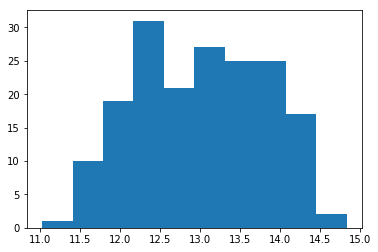

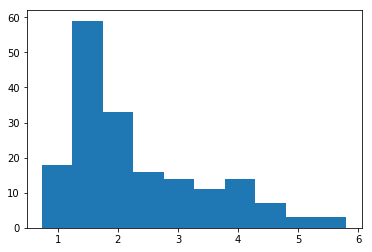

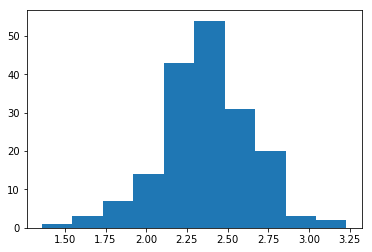

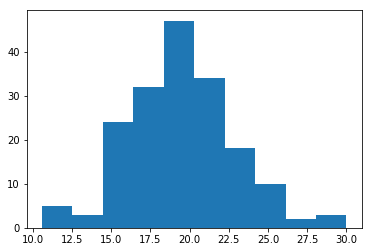

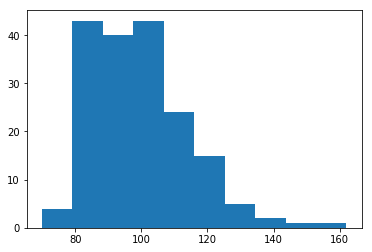

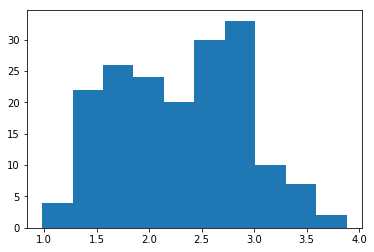

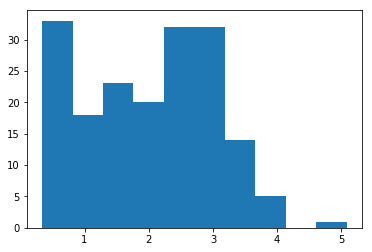

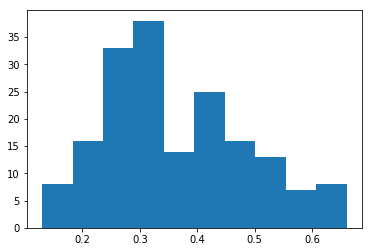

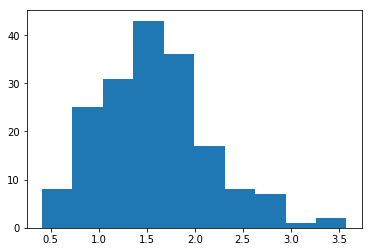

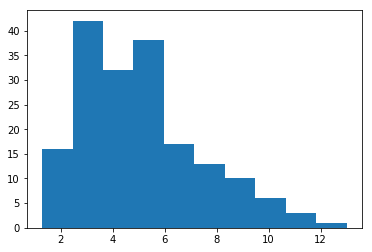

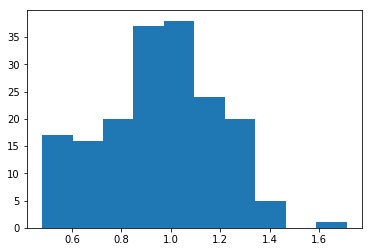

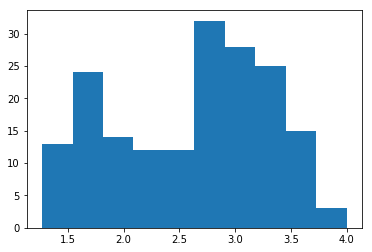

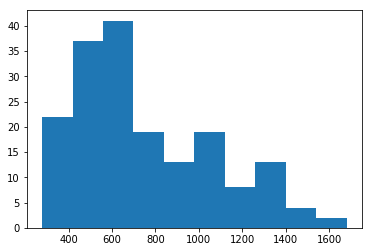

In [9]:
# plot histograms of the data
for i in range(len(df.columns)):
    plt.hist(df[i])
    plt.show()

In [10]:
# Check the targets (response)
targets = wines.target
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Data preprocessing

In [11]:
# Check for normality
norm = [stats.normaltest(df[i])[1] for i in df.columns]
print(norm)

[0.00034163202531285264, 3.1742168603714762e-06, 0.03631602067034469, 0.21004273588925534, 4.658884716268434e-09, 0.0005556667174637149, 0.00012693297763919295, 0.0026647025727076653, 0.008000813483971013, 5.31947611640046e-05, 0.594729042205703, 4.8789809118220485e-11, 0.0004256462644890612]


In [105]:
# Split the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, targets)

In [27]:
# Scale the inputs
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [95]:
rndf = RandomForestClassifier(n_estimators=15)
rndf.fit(X_train, y_train).score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [157]:
# Learn a random forest on the data, and tune hyperparameters simultaneously
param_grid = {
    'n_estimators': range(10,100, 10),
    'max_depth': [3, 5, 10, None]
}

scorers = {
    'precision_score': make_scorer(precision_score, average='micro'),
    'recall_score': make_scorer(recall_score, average='micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='micro')
}

rndf = GridSearchCV(RandomForestClassifier(), param_grid, scoring=scorers, refit='f1_score',
                   return_train_score=True)
rndf.fit(X_train, y_train).cv_results_

{'mean_fit_time': array([0.01186411, 0.01721239, 0.0252339 , 0.03326567, 0.04127423,
        0.05215438, 0.05782143, 0.06618611, 0.07525158, 0.00901246,
        0.01722137, 0.02541192, 0.03376571, 0.04177976, 0.05061229,
        0.05765835, 0.0665044 , 0.07405448, 0.0086956 , 0.01774462,
        0.02505549, 0.0334123 , 0.04160523, 0.04997746, 0.05816611,
        0.06534457, 0.07502413, 0.00868972, 0.01704526, 0.02489972,
        0.03308845, 0.04028567, 0.0498    , 0.05865741, 0.06851586,
        0.0740339 ]),
 'std_fit_time': array([2.32711250e-03, 4.72887650e-04, 2.36247135e-04, 4.80367559e-04,
        2.38630307e-04, 2.28655363e-03, 9.40107975e-04, 1.10706128e-03,
        2.62154888e-03, 1.70276050e-05, 2.56478804e-04, 4.64683064e-04,
        2.32344937e-04, 2.32327212e-04, 1.77838539e-03, 4.05789091e-04,
        8.29285038e-04, 8.42911412e-04, 2.30540534e-04, 9.27406417e-04,
        1.53988792e-05, 2.29157700e-04, 4.16513414e-04, 6.37067808e-04,
        4.16310624e-04, 1.03085042e-0

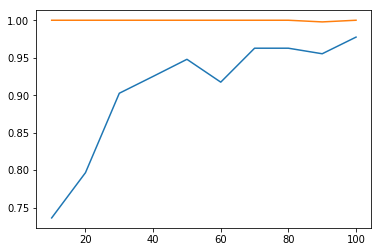

In [142]:
# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(RandomForestClassifier(), X_train, y_train, train_sizes=range(10, 110, 10), cv=5)
plt.plot(range(10, 110, 10), np.mean(valid_scores, axis=1))
plt.plot(range(10, 110, 10), np.mean(train_scores, axis=1))
plt.show()

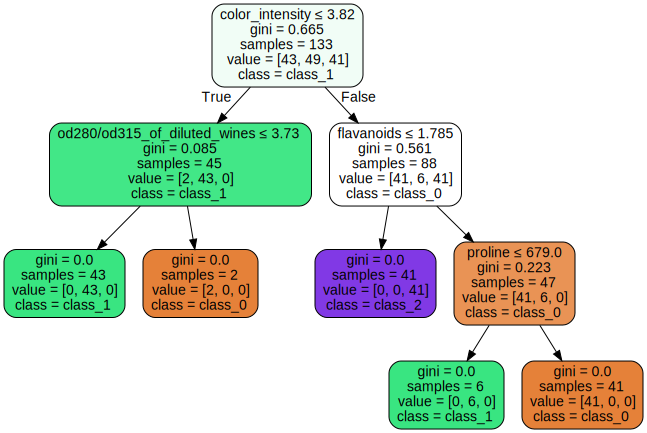

In [28]:
# learn the tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=wines.feature_names,  
                         class_names=wines.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [68]:
cross_val_score(clf, X_test, y_test)

array([0.70588235, 0.78571429, 0.85714286])

In [41]:
rnd_forest_clf = RandomForestClassifier()
rnd_forest_clf.fit(X_train, y_train)
print(rnd_forest_clf.predict(df) - targets)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
